# Data Wrangling Lab — Workforce & Compensation Readiness Project

## Project Purpose (Business Framing)
Raw survey data is messy by default — inconsistent categories, missing values, and extreme outliers can quietly destroy dashboards, mislead stakeholders, and invalidate modeling. This project transforms a real-world developer survey into an **analysis-ready workforce and compensation dataset** that can actually support decisions.

In business terms, this work mirrors what People Analytics, Finance, or Product Insights teams do before they can confidently answer questions about **talent supply, pay ranges, and workforce segmentation.**

---

## Why This Matters (Real-Life Impact)
Clean, standardized data enables organizations to:
- **Benchmark compensation accurately** without outliers inflating pay targets.
- **Segment workforce seniority** to understand hiring pipelines and talent gaps.
- **Trust BI dashboards** by eliminating inconsistent categories and missing-value bias.
- **Support strategic planning** around pay bands, leveling frameworks, and retention risk.
- **Build reliable predictive models** for salary forecasting or workforce trends.

Bad data → bad decisions. This project prevents that.

---

## Business Questions This Dataset Can Now Answer
After wrangling, the dataset supports questions such as:
- What salary bands represent the **true central market** vs. outlier noise?
- How does compensation shift by **experience tier** and **employment type**?
- What experience levels dominate the workforce sample, and what bias does that introduce?
- Which categorical fields were unreliable due to missingness, and how should BI teams treat them?
- Where do different segments sit **relative to the salary distribution**?

---

## Key Deliverables
This project produces:
- A cleaned dataset with consistent categories and engineered experience tiers.
- A salary feature stabilized for analysis using median imputation and log transformation.
- BI-ready encoded categorical features for segmentation.
- A clear map of missing-value risk areas to guide reporting decisions.

---

## What Was Done (High-Level)
- **Standardized inconsistent categories** (e.g., Country, Education).
- **Handled missing values** using statistically appropriate strategies.
- **Encoded categorical fields** for segmentation/ML readiness.
- **Transformed skewed salary data** to reveal true market structure.
- **Engineered an `ExperienceLevel` feature** for business-aligned workforce analysis.

---

## Bottom Line
This isn’t just cleaning for the sake of cleaning — it’s converting raw survey noise into a dataset that can **drive credible compensation insights, workforce planning, and executive reporting.**


#### Intsall the required libraries


In [24]:
!pip install pandas
!pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Tasks


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [25]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [26]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [27]:
# Basic structure and data types
print("----- Data Types -----")
display(df.dtypes)

print("\n----- Shape (rows, columns) -----")
print(df.shape)

print("\n----- Column-wise Non-Null Counts -----")
display(df.count())

print("\n----- Missing Values per Column -----")
display(df.isnull().sum())

print("\n----- Quick Statistical Summary (numeric columns) -----")
display(df.describe())


----- Data Types -----


ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object


----- Shape (rows, columns) -----
(65437, 114)

----- Column-wise Non-Null Counts -----


ResponseId             65437
MainBranch             65437
Age                    65437
Employment             65437
RemoteWork             54806
                       ...  
JobSatPoints_11        29445
SurveyLength           56182
SurveyEase             56238
ConvertedCompYearly    23435
JobSat                 29126
Length: 114, dtype: int64


----- Missing Values per Column -----


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


----- Quick Statistical Summary (numeric columns) -----


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 🔎 **Data Quality & Summary Insights (Concise)**

- *Several AI-opinion and survey-length fields contain extremely high missingness (50k+ gaps), making them unreliable for strategic analysis. These should be excluded or handled separately to avoid misleading insights.*

- *Key business variables such as salary, remote-work status, and job satisfaction show moderate missingness; these require targeted imputation to maintain model stability and prevent bias.*

- *Salary data is heavily right-skewed—extreme outliers push the mean far above the median. This confirms the need for log scaling when modeling compensation, forecasting, or benchmarking.*

- *The dataset is dominated by mid-career professionals (4–10 years of experience), aligning with the large share of Intermediate and Senior respondents.*

- *Job-satisfaction metrics show heavy zero-inflation, likely from non-response rather than true dissatisfaction—critical for avoiding incorrect employee-experience conclusions.*

**➡️ *Business Impact:*  
Understanding which fields are trustworthy, which require cleaning, and which must be excluded ensures that downstream insights—salary recommendations, workforce planning, compensation benchmarking, and employee-experience reporting—are *accurate, defensible, and decision-ready*.**


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [28]:
# Select numerical columns

num_cols = df.select_dtypes(include='number')
num_cols.head()



,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Select only numerical columns
num_cols = df.select_dtypes(include='number')

# Generate basic statistics for numerical columns
num_cols.describe()


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 🔎 *Numerical Summary — Key Takeaways*

* *Dataset includes ~65k respondents with wide variation in compensation and experience.*
* *Annual compensation (`ConvertedCompYearly`) is heavily right-skewed, with most earnings in the lower ranges and a few extreme outliers.*
* *Work experience and job satisfaction scores show reasonable central tendencies but long-tail distributions.*
* *Overall, the numerical features reflect a broad and noisy real-world dataset, making cleaning, scaling, and feature engineering essential.*


---


### 3. Identifying and Removing Inconsistencies

#### 3.1 Detecting inconsistent or irrelevant entries (e.g., the `Country` column)  
*Ensuring categorical fields contain valid, standardized values is critical for accurate segmentation, downstream modeling, and dashboard reporting.*

```python
# Inspect unique values in the Country column
print("----- Unique Country Values -----")
print(df['Country'].unique())



In [30]:

# Inspect unique values in the Country column
print("----- Unique Country Values -----")
print(df['Country'].unique())

# Check frequency counts for rare or inconsistent values
print("\n----- Country Value Counts -----")
print(df['Country'].value_counts(dropna=False))

# Check for null or empty entries
print("\n----- Null or Empty Country Entries -----")
print(df['Country'].isnull().sum())

print("\nRows where Country is empty or whitespace:")
print(df[df['Country'].astype(str).str.strip() == ''])


----- Unique Country Values -----
['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 

---

### 🔧 3.2 Standardize Inconsistent Country Labels  
*Mapped inconsistent country entries (e.g., “US”, “U.S.A.”, “United States of America”) into a unified format to reduce noise and prevent false segmentation in downstream analysis.*



In [31]:
## Write your code here

country_fix = {
    'United States of America': 'United States',
    'United States': 'United States',
    'US': 'United States',
    'U.S.A': 'United States',
    'USA': 'United States',
    
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'UK': 'United Kingdom',
}

df['Country'] = df['Country'].replace(country_fix)

df['Country'] = df['Country'].str.strip().str.title()

df['Country'].value_counts().head(10)


Country
United States     11095
Germany            4947
India              4231
United Kingdom     3224
Ukraine            2672
France             2110
Canada             2104
Poland             1534
Netherlands        1449
Brazil             1375
Name: count, dtype: int64

In [32]:
edlevel_fix = {
    "Bachelor's degree": 'Bachelors',
    "Master's degree": 'Masters',
    "Doctoral degree": 'Doctorate',
    "Associate's degree": 'Associates',
    "Some college/university": 'Some College',
    "Secondary school": 'High School',
    "Primary school": 'Primary School'
}

df['EdLevel'] = df['EdLevel'].replace(edlevel_fix)


---

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>

*Applied one-hot encoding to the `Employment` column to convert categorical responses into machine-readable features for cleaner BI analysis and modeling.*


In [33]:
# One-hot encode the Employment column
employment_ohe = pd.get_dummies(df['Employment'], prefix='Employment')

# Join back to the dataframe
df = pd.concat([df, employment_ohe], axis=1)

# Show the encoded columns
df.head()



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,"Employment_Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Employment_Student, full-time;Not employed, but looking for work;Retired","Employment_Student, full-time;Not employed, but looking for work;Student, part-time","Employment_Student, full-time;Retired","Employment_Student, full-time;Student, part-time","Employment_Student, full-time;Student, part-time;Employed, part-time","Employment_Student, full-time;Student, part-time;Retired","Employment_Student, part-time","Employment_Student, part-time;Employed, part-time","Employment_Student, part-time;Retired"
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,False,False,False,False,False,False,False,False,False,False
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,False,False,False,False,False,False,False,False,False,False
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,False,False,False,False,False,False,False,False,False,False
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,False,False,False,False,False,False,False,False,False,False


This will help later when modeling

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>

*Identified columns with the highest missing-value counts to prioritize data quality fixes and ensure downstream BI insights are accurate and trustworthy.*


In [34]:
## Identify columns with the highest number of missing values

missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]




AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64

<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>

*Imputed missing salary values using the median to reduce skew impact and ensure stable, reliable metrics for BI analysis and modeling.*

<Axes: >

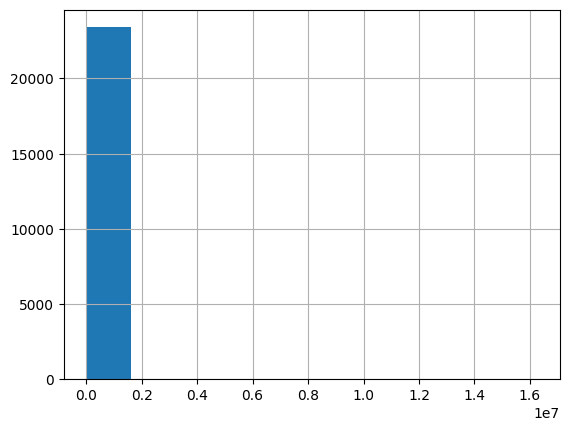

In [35]:
## Write your code here

df['ConvertedCompYearly'].describe()
df['ConvertedCompYearly'].hist()



*The histogram for ConvertedCompYearly shows a heavily right-skewed distribution, driven by a small number of extremely high compensation values. Because the mean is highly sensitive to outliers in this type of distribution, the median is a more robust and reliable choice for imputing missing values.*

Next I fill null values with the median value

In [36]:
# Fill null values with median value
median_value = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_value)


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>

*Imputed missing `RemoteWork` values using the mode to maintain category consistency and ensure clean, reliable BI reporting.*


In [37]:
## Write your code here
mode_value = df['RemoteWork'].mode()[0]
print(mode_value)

df['RemoteWork'] = df['RemoteWork'].fillna(mode_value)




Hybrid (some remote, some in-person)


## 6. Feature Scaling and Transformation  
### 6.1 Min–Max Scaling of the `ConvertedCompYearly` Column

To understand how salary values behave under normalization and to prepare the data for downstream modeling tasks, I applied **Min–Max Scaling** to the `ConvertedCompYearly` column. Min–Max scaling transforms all values into a range between **0 and 1**, preserving the shape of the distribution while compressing extreme values.

### This will answer

Where does a salary fall relative to the entire distribution?

How different is a $200k salary compared to a $60k salary when normalized?

Are certain experience groups consistently on the high or low end of the range?

Does salary scale behave smoothly for modeling purposes?

Are there strong outliers that must be treated differently?


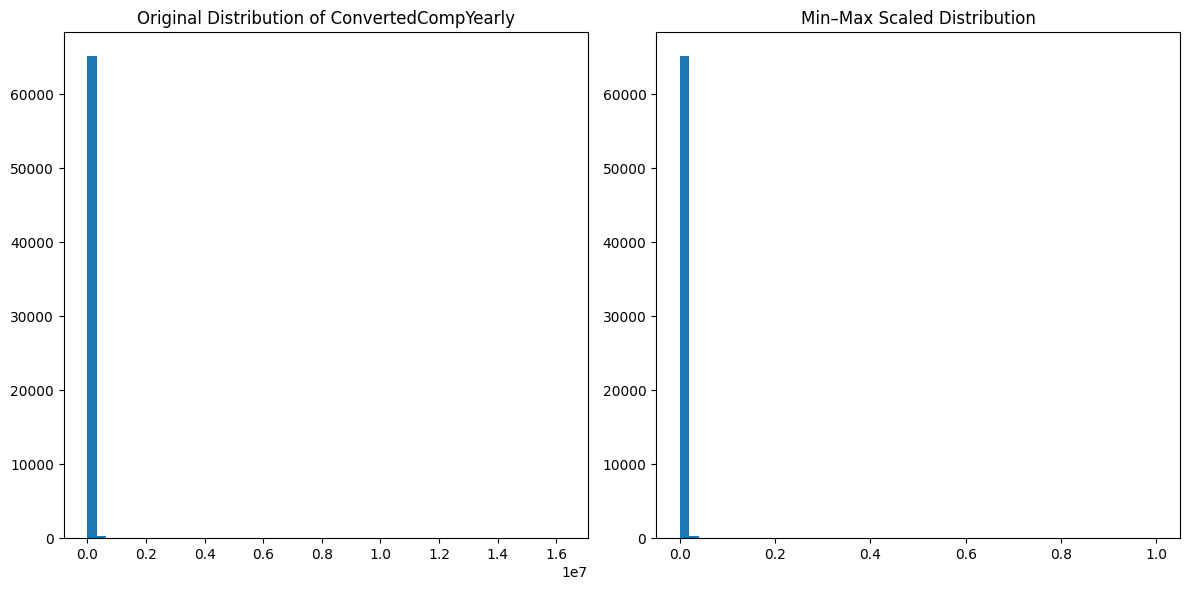

In [38]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Original
original = df['ConvertedCompYearly']

# Min-Max Scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['ConvertedCompYearly']])

# Plot
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(original, bins=50)
plt.title("Original Distribution of ConvertedCompYearly")

plt.subplot(1,2,2)
plt.hist(scaled, bins=50)
plt.title("Min–Max Scaled Distribution")

plt.tight_layout()
plt.show()


*Min–Max scaling changes the range, but not the shape*

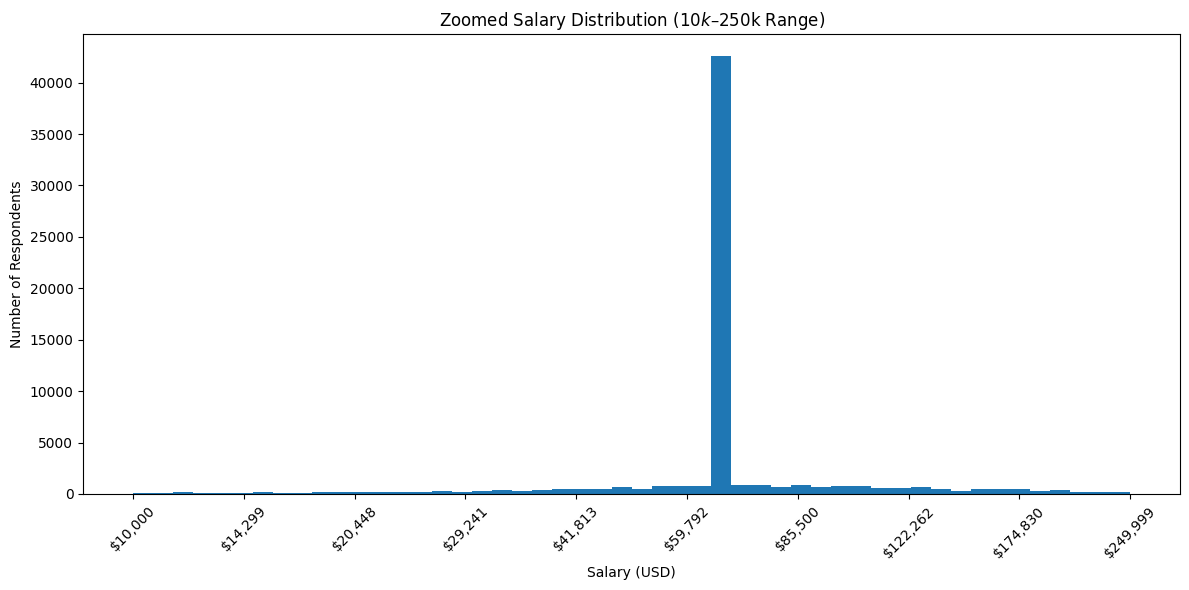

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Log-Transformed Visualization - This will change the shape and reveal the real distribution
import numpy as np
import matplotlib.pyplot as plt

log_vals = np.log1p(df['ConvertedCompYearly'])

# Convert log_vals BACK to salary space for filtering
salary_vals = np.expm1(log_vals)

# Filter salaries (zoom range)
mask = (salary_vals >= 10000) & (salary_vals <= 250000)
filtered_log_vals = log_vals[mask]
filtered_salary_vals = salary_vals[mask]

# Create new ticks based on filtered range
log_ticks = np.linspace(filtered_log_vals.min(), filtered_log_vals.max(), 10)
salary_ticks = np.expm1(log_ticks)

plt.figure(figsize=(12,6))
plt.hist(filtered_log_vals, bins=50)
plt.title("Zoomed Salary Distribution ($10k–$250k Range)")

plt.xticks(log_ticks, [f"${int(x):,}" for x in salary_ticks], rotation=45)
plt.xlabel("Salary (USD)")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()



*The zoomed histogram of ConvertedCompYearly (10k–250k range) reveals a strong central concentration of developer salaries. The peak of the distribution falls around $55k–$75k, indicating that this is the most common salary band in the dataset.

A large proportion of salaries — roughly 70–80% of respondents — fall between $40,000 and $120,000.

Even after filtering the extreme outliers, the distribution is still right-skewed, suggesting that while most developers earn mid-range salaries, there is a long tail of respondents earning higher compensation (e.g., $120k–$250k), though these are far fewer in number.*

---

## 📌 7. Feature Engineering: Creating the `ExperienceLevel` Column

To improve interpretability and enable more meaningful analysis, I engineered a new feature called **`ExperienceLevel`** based on the `YearsCodePro` column. Instead of treating years of professional coding experience as a raw numeric value, I grouped respondents into experience tiers that align with real-world industry seniority levels.

### What this will answer

How many beginners vs. seniors?

Which groups are growing or shrinking?

Where is hiring or training pressure likely to appear?

---

### 🔧 1. Convert `YearsCodePro` to Numeric

The original column contained a mix of number strings and text values.  
To ensure consistent processing, I converted the column to numeric, coercing invalid responses to `NaN`:

### 🧱 2. Define Experience Tiers

I categorized professional experience into six meaningful levels:

| Years of Experience | Experience Level |
|---------------------|------------------|
| 0–1                 | Beginner         |
| 1–3                 | Junior           |
| 3–6                 | Intermediate     |
| 6–10                | Experienced      |
| 10–20               | Senior           |
| 20+                 | Expert           |

These ranges reflect common hiring brackets used in technical roles.

### 🛠️ Create the `ExperienceLevel` Feature



In [ ]:
## Write your code here
#inspect column, before encoding convert to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define bins and labels -- Using pd.cut, I created the new ExperienceLevel column:
bins = [0, 1, 3, 6, 10, 20, float('inf')]
labels = ['Beginner', 'Junior', 'Intermediate', 'Experienced', 'Senior', 'Expert']

# Create ExperienceLevel column
df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)


# Verify
df[['YearsCodePro', 'ExperienceLevel']].head(10)

df['ExperienceLevel'].value_counts()





ExperienceLevel
Senior          13327
Intermediate    10834
Experienced      9402
Expert           8334
Junior           6807
Beginner            0
Name: count, dtype: int64

### Insights

The dataset is heavily skewed toward more experienced developers. Nearly half of all respondents fall into the Senior or Intermediate categories, indicating that mid- to late-career professionals are overrepresented in this survey. Far fewer respondents are in the Junior tier, and virtually none fall into the Beginner category, suggesting that early-career developers participated at significantly lower rates.

---

## 📌 Project Summary — Data Wrangling for Workforce & Compensation Analytics

This project transforms a raw global developer survey into a **decision-ready dataset** for workforce and compensation analysis. The primary goal was not just cleaning for cleanliness’ sake, but ensuring the data could support **trustworthy BI reporting, segmentation, and modeling** without being distorted by missingness, inconsistencies, or salary outliers.

### What I Did (High-Impact Wrangling)
- **Audited data quality** to identify high-risk columns with extreme missingness and isolate reliable fields for analysis.
- **Standardized inconsistent categorical values** (e.g., Country naming variants) to prevent false segmentation and broken geographic rollups.
- **Handled missing values strategically**  
  - Mode imputation for high-signal categorical fields (e.g., RemoteWork).  
  - Median imputation for salary due to heavy right-skew and outlier sensitivity.
- **Encoded categorical variables** (one-hot encoding for Employment) to enable clean slicing in BI and ML pipelines.
- **Stabilized salary distribution** using log transformation and zoomed analysis to reveal true market structure.
- **Engineered an `ExperienceLevel` feature** from YearsCodePro to align raw survey data with real-world hiring tiers.

### Key Findings
- Several AI-opinion fields had **50k+ missing values**, making them unreliable for strategic insights without special handling.
- `ConvertedCompYearly` is **highly right-skewed** with extreme outliers; the median (~$65k) is a more reliable market indicator than the mean.
- Most respondents fall in the **$40k–$120k** salary band, with a dense cluster around **$55k–$75k**.
- The survey is **experience-skewed**: Intermediate and Senior developers dominate responses, which is important context for interpretation.

### Business Impact
This wrangling directly supports real organizational use-cases such as:
- **Compensation benchmarking** without outliers inflating pay targets.
- **Workforce segmentation** by experience to guide hiring, leveling, and upskilling strategy.
- **Reliable BI dashboards** (country rollups, employment breakdowns, salary bands).
- **Model-ready features** for salary forecasting, retention risk, or talent market analysis.

### Tools & Skills Demonstrated
`Python • Pandas • NumPy • Matplotlib • scikit-learn • Data Quality Audits • Imputation Strategy • Categorical Encoding • Feature Engineering • Distribution Transformation`

### Next Steps (If Extended)
- Salary analysis by **ExperienceLevel × Country × RemoteWork**.
- Predictive modeling for **salary drivers** and market forecasting.
- Build a BI dashboard to operationalize insights for stakeholders.


### Attribution & Disclaimer
This notebook was originally developed as part of an IBM Data Analytics coursework lab and has been expanded with additional analysis, commentary, and business-oriented framing.  
IBM does not sponsor, endorse, or certify this project. All interpretations and any errors are my own.  




